In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [245]:
# Parametersfor the benchmarking
fps=295
num_particles=1000
dt=1.0/fps
spatial_resolution=30E-06  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution

0.00021903148058823087


Generating initial x coordinates

In [246]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_trunc= sample_x_in_resol.astype(int)
# print(sample_x_trunc[:10])
sample_x_trunc_SI=sample_x_trunc.astype(float)*spatial_resolution

print(sample_x_trunc_SI)
# print(sample_x_SI)

[3.621e-02 1.476e-02 6.000e-04 6.900e-03 3.027e-02 6.750e-03 1.578e-02
 8.940e-03 1.476e-02 2.253e-02 4.755e-02 4.731e-02 8.910e-03 1.095e-02
 2.478e-02 3.585e-02 5.175e-02 3.801e-02 5.145e-02 4.842e-02 2.910e-02
 2.814e-02 3.837e-02 1.323e-02 4.578e-02 4.314e-02 3.078e-02 3.528e-02
 1.986e-02 5.199e-02 5.115e-02 1.308e-02 4.005e-02 1.269e-02 8.850e-03
 3.108e-02 1.638e-02 4.959e-02 2.565e-02 4.296e-02 2.730e-03 2.037e-02
 4.086e-02 3.474e-02 2.769e-02 2.268e-02 3.990e-03 6.870e-03 1.131e-02
 3.780e-03 4.473e-02 8.400e-03 2.160e-03 2.742e-02 3.009e-02 2.586e-02
 6.630e-03 5.490e-03 3.426e-02 3.156e-02 1.221e-02 7.500e-04 4.776e-02
 1.245e-02 4.008e-02 1.629e-02 1.404e-02 1.761e-02 3.558e-02 2.670e-03
 3.477e-02 2.427e-02 2.748e-02 2.163e-02 2.073e-02 2.649e-02 4.695e-02
 5.091e-02 1.005e-02 5.007e-02 4.617e-02 4.917e-02 4.542e-02 3.420e-02
 6.660e-03 2.457e-02 1.329e-02 6.240e-03 3.663e-02 1.719e-02 2.277e-02
 3.285e-02 3.210e-03 2.328e-02 4.761e-02 4.419e-02 3.231e-02 3.942e-02
 1.188

In [247]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

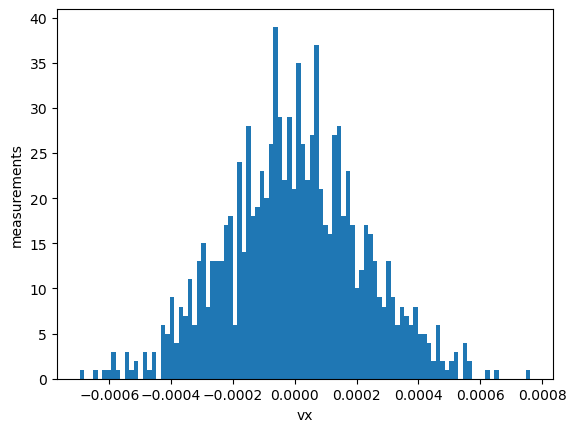

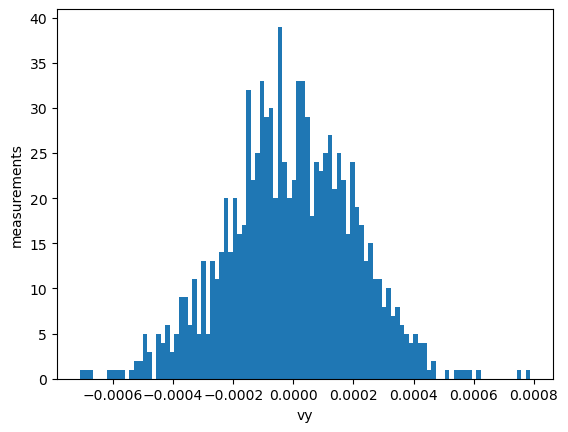

In [248]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

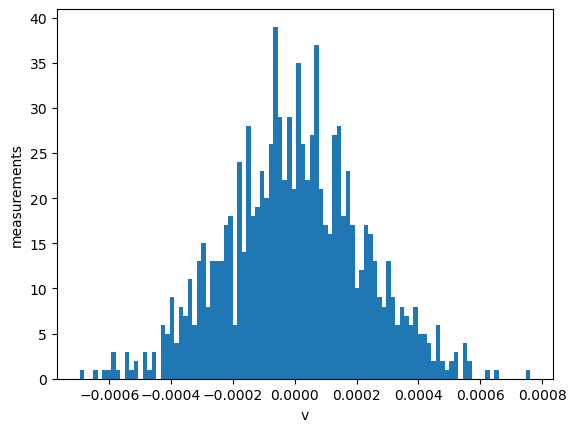

In [249]:
# Simulating the motion of the particles
x_forward=sample_x_trunc_SI+sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
x_forward_trunc=x_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc.astype(float)*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

In [250]:
# Calculating restored velocities
v_restored=(x_forward_SI- sample_x_trunc_SI)/dt
print(v_restored)
# fig, ax = plt.subplots()
# ax.hist(v_restored, 10) # plot histogram
# ax.set_xlabel('v')
# ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

[-0.00885 -0.00885 -0.00885 -0.00885  0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.      -0.00885 -0.00885
  0.       0.      -0.00885  0.      -0.00885 -0.00885  0.       0.
  0.      -0.00885 -0.00885  0.      -0.00885  0.      -0.00885  0.
  0.       0.       0.      -0.00885 -0.00885 -0.00885  0.      -0.00885
 -0.00885  0.       0.      -0.00885 -0.00885 -0.00885  0.      -0.00885
 -0.00885  0.       0.      -0.00885  0.      -0.00885  0.      -0.00885
 -0.00885  0.      -0.00885  0.       0.      -0.00885  0.       0.
  0.      -0.00885  0.      -0.00885 -0.00885 -0.00885 -0.00885 -0.00885
  0.       0.       0.      -0.00885 -0.00885  0.       0.       0.
  0.      -0.00885  0.       0.       0.       0.      -0.00885 -0.00885
  0.      -0.00885 -0.00885  0.      -0.00885 -0.00885 -0.00885  0.
  0.       0.       0.       0.      -0.00885 -0.00885  0.      -0.00885
  0.       0.       0.      -0.00885 -0.00885  0.       0.       0.
  0.       0.

Code to simulate motion in y

In [251]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_y = sts.uniform(left_SI, right_SI-left_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
# print(sample_x_trunc)
sample_y_trunc= sample_y_in_resol.astype(int)
# print(sample_x_trunc)
sample_y_trunc_SI=sample_y_trunc.astype(float)*spatial_resolution
# print(sample_y_trunc_SI
    #)
# print(sample_x_SI)

Text(0, 0.5, 'measurements')

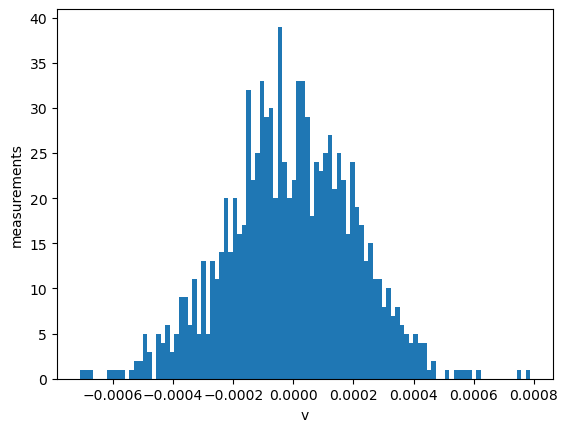

In [252]:
# Simulating the motion of the particles
y_forward=sample_y_trunc_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_trunc=y_forward_in_resol.astype(int)
# print(x_forward_trunc)
y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates

In [253]:
def make_coord_df(init_frame,final_frame, num_particles, init_x_trunc_SI, init_y_trunc_SI, sample_vx,sample_vy, dt,spatial_resolution):
    frame_data = []
    while init_frame <= final_frame:
        # Simulating the motion of the particles for x coordinates
        x_forward = init_x_trunc_SI + sample_vx * dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution

        # Simulating the motion of the particles for y coordinates
        y_forward = init_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- init_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- init_y_trunc_SI)/dt

        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([init_x_trunc_SI[j], init_y_trunc_SI[j], j,sample_vx[j],sample_vy[j],v_restored_x[j],v_restored_y[j],init_frame])
        
        # Update the initial positions for the next frame
        init_x_trunc_SI = x_forward_SI
        init_y_trunc_SI = y_forward_SI
        init_frame += 1
    # Create a DataFrame
    x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'vx (unrestored)','vy (unrestored)','vx (restored)','vy (restored)','frame'])
    return x_y_df


In [254]:
coord_df=make_coord_df(1,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
print(coord_df[coord_df['frame'] == 1]['vx (unrestored)'])

0     -0.000351
1     -0.000235
2     -0.000165
3     -0.000011
4      0.000062
         ...   
995    0.000342
996    0.000437
997   -0.000045
998   -0.000186
999    0.000280
Name: vx (unrestored), Length: 1000, dtype: float64


Function to get the discrepancies

In [255]:
def get_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [256]:
get_discrepancies(v_restored,sample_vx)

10849.165840066235

Function to create the database of velocities

In [257]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    init_frame=1
    final_frame=3 #using it as 2 now will parametrise it when making a general function
    dt=1/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution
    
    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    # Generate a sample of 1000 random velocities from a normal distribution
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    norm_rv = sts.norm(mu, sigma)
    sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
    
    # # Simulating the motion of the particles for x coordinates
    # x_forward = sample_x_trunc_SI + sample_vx * dt
    # x_forward_in_resol = x_forward / spatial_resolution
    # x_forward_trunc = x_forward_in_resol.astype(int)
    # x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution

    # # Simulating the motion of the particles for y coordinates
    # y_forward = sample_y_trunc_SI + sample_vy * dt
    # y_forward_in_resol = y_forward / spatial_resolution
    # y_forward_trunc = y_forward_in_resol.astype(int)
    # y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

    # # Calculating restored velocities
    # v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
    # v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
    coord_df=make_coord_df(init_frame,final_frame, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
    return coord_df

In [258]:
coord_df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)

# print(coord_df['vx (unrestored)'].mean())
# print(coord_df['vx(restored)'].mean())

# print(np.abs((coord_df['vx (unrestored)'].mean()-coord_df['vx(restored)'].mean())/coord_df['vx (unrestored)'].mean()))


In [259]:
print(coord_df[coord_df['frame'] == 1]['vx (restored)'])
print(np.nonzero(coord_df[coord_df['frame'] == 1]['vx (restored)']))

0      0.00000
1     -0.00885
2      0.00000
3     -0.00885
4      0.00000
        ...   
995   -0.00885
996    0.00000
997    0.00000
998   -0.00885
999    0.00000
Name: vx (restored), Length: 1000, dtype: float64
(array([  1,   3,   5,   6,   7,   8,   9,  14,  15,  18,  19,  21,  22,
        23,  29,  30,  32,  33,  35,  36,  39,  40,  41,  47,  48,  50,
        52,  57,  59,  60,  61,  65,  68,  70,  71,  74,  75,  78,  79,
        81,  83,  84,  87,  91,  92,  94,  95,  98, 100, 101, 106, 107,
       108, 110, 113, 114, 115, 119, 120, 121, 123, 124, 125, 128, 129,
       130, 131, 133, 135, 138, 139, 141, 142, 143, 146, 149, 150, 151,
       152, 153, 155, 159, 160, 161, 162, 163, 165, 167, 168, 169, 170,
       176, 177, 179, 180, 188, 189, 190, 191, 192, 194, 195, 202, 205,
       206, 207, 208, 210, 212, 214, 215, 216, 217, 220, 223, 224, 231,
       232, 233, 234, 236, 237, 238, 239, 241, 248, 253, 256, 257, 259,
       260, 261, 262, 265, 266, 268, 271, 272, 275, 278, 280, 28

In [260]:
fps_arr=[100,200,300,400,800,1600,3200]
disc_arr=[]

for i in fps_arr:
    coord_df=make_coord_df(1,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, 1/i,spatial_resolution)
    # print(coord_df['vx (unrestored)'].mean())
    # print(coord_df['vx(restored)'].mean())
    disc=get_discrepancies(coord_df['vx (restored)'],coord_df['vx (unrestored)'])
    # disc=(np.abs((coord_df['vx (unrestored)'].mean()-coord_df['vx(restored)'].mean())/coord_df['vx (unrestored)'].mean()))
    np.append(disc_arr,disc)
    print(disc)


3677.4189288360253
7355.23785767205
11033.056786508076
14710.875715344102
29422.1514306882
58844.702861376405
117689.8057227528
